# Feature Engineering - Predicting House Sale Prices

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [2]:
df = pd.read_csv("AmesHousing.csv")
pd.options.display.max_columns =200
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Feature Engineering

### Example of the data flow we want to create

We want to create 3 functions that execute the following steps : 
- Step 1 : Transform the features (Feature engineering)
- Step 2 : Selects the features
- Step 3 : Trains and tests

We will first do a simple version of these functions, and run them to see the inital result. Then we will improve each step and rerun the functions. The goal is to see that at each step of improvement, our result should get better.

In [3]:
# Step 1 : We create a function that transforms features. For now let's not transform anything.
def transform_features(df_fct1) :
    return df_fct1

In [4]:
# Step 2 : We create a function that selects the features. For now we just try with 2 features.
def select_features(df_fct2) :
    return df_fct2[["Gr Liv Area", "SalePrice"]]

In [5]:
# Step 3 : We create a function that trains and tests. More specifically it does the following :
    
# Selects the first 1460 rows from from data and assign to train.
# Selects the remaining rows from data and assign to test.
# Trains a model using all numerical columns except the SalePrice column (the target column) 
# Tests the model on the test set and returns the RMSE value.

def train_and_test(df_fct3) :
    train = df_fct3.iloc[:1460,]
    test = df_fct3.iloc[1460:,]
    train_num = train.select_dtypes(include=['integer', 'float'])
    features = train_num.drop(['SalePrice'], axis = 1).columns
    
    lr = LinearRegression()
    lr.fit(train_num[features], train_num['SalePrice'])

    train_num_predictions = lr.predict(test[features])
    train_num_mse = mean_squared_error(train_num_predictions, test['SalePrice'])
    train_num_rmse = np.sqrt(train_num_mse)
    return train_num_rmse

In [6]:
# This is the main (we run all functions)
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
print(rmse)

57088.25161263909


We get a result of 57088. As we improve the steps of feature transformation, feature selection and training and testing. We will rerun the results (the main) for each step and we should see that this result should improve at each step.

### Step 1 : Improving feature transformation

In [7]:
# We improve the function transform_features
# The transform_features() function shouldn't modify the train data frame and instead return a new one entirely.
# This way, we can keep using train in the experimentation cells.

def transform_features2(df_fct1) :
    row_count = df_fct1.shape[0]
    
    # All Columns : Drop any with 5% or more missing values for now.
    cutoff20 = round(row_count / 20)
    criteria = df_fct1.isnull().sum() < cutoff20
    df_train_clean = df_fct1.loc[:, criteria]
    
    # Text columns : Drop any with 1 or more missing values for now. 
    criteria_text = df_train_clean.select_dtypes(include=['object']).isnull().sum() >= 1
    text_cols_todrop = criteria_text[criteria_text].index
    df_train_clean = df_train_clean.drop(text_cols_todrop, axis=1)

    # Numerical columns : For columns with missing values, fill in with the most common value in that column
    df_num_cols_fill = df_train_clean.select_dtypes(include=['integer', 'float']).columns
    df_train_clean[df_num_cols_fill] = df_train_clean[df_num_cols_fill].fillna(df_train_clean[df_num_cols_fill].mean())
    
    #cutoff5 = round(row_count / 20)
    #df_train_clean = df_train_clean.loc[:, (df_train_clean.isnull().sum() < cutoff5) & (df_train_clean.isnull().sum() > 0)]
    #columns_to_fill = (df_train_clean.isnull().sum() < cutoff5) & (df_train_clean.isnull().sum() > 0)
    
    # What new features can we create, that better capture the information in some of the features?
    df_train_clean['Years Before Sale'] = df_train_clean['Yr Sold'] - df_train_clean['Year Built']
    df_train_clean['Years Since Remod'] = df_train_clean['Yr Sold'] - df_train_clean['Year Remod/Add']
    df_train_clean = df_train_clean.drop([1702, 2180, 2181], axis=0)

    ## No longer need original year columns
    df_train_clean = df_train_clean.drop(["Year Built", "Year Remod/Add"], axis = 1)

    ## Drop columns that aren't useful for ML
    df_train_clean = df_train_clean.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df_train_clean = df_train_clean.drop(["Mo Sold", "Sale Condition", "Sale Type"], axis=1)
    
    # df_train_clean.isnull().sum()[df_train_clean.isnull().sum().sort_values(ascending = False) > 0]
    return df_train_clean

In [8]:
# We update the main
transformed_df = transform_features2(df)
filtered_feature_df = select_features(transformed_df)
rmse = train_and_test(filtered_feature_df)

print(rmse)

55275.367312413066


This result is better than the previous 57088. So good feature engineering on it's own without changing the modelling shows an improvement.

### Step 2 : Improving feature selection

In [9]:
# Remove columns that are not numerical
numerical_df = transformed_df.select_dtypes(include=['integer', 'float'])
numerical_df.head(5)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,2010,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,2010,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,2010,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,2010,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,2010,189900,13,12


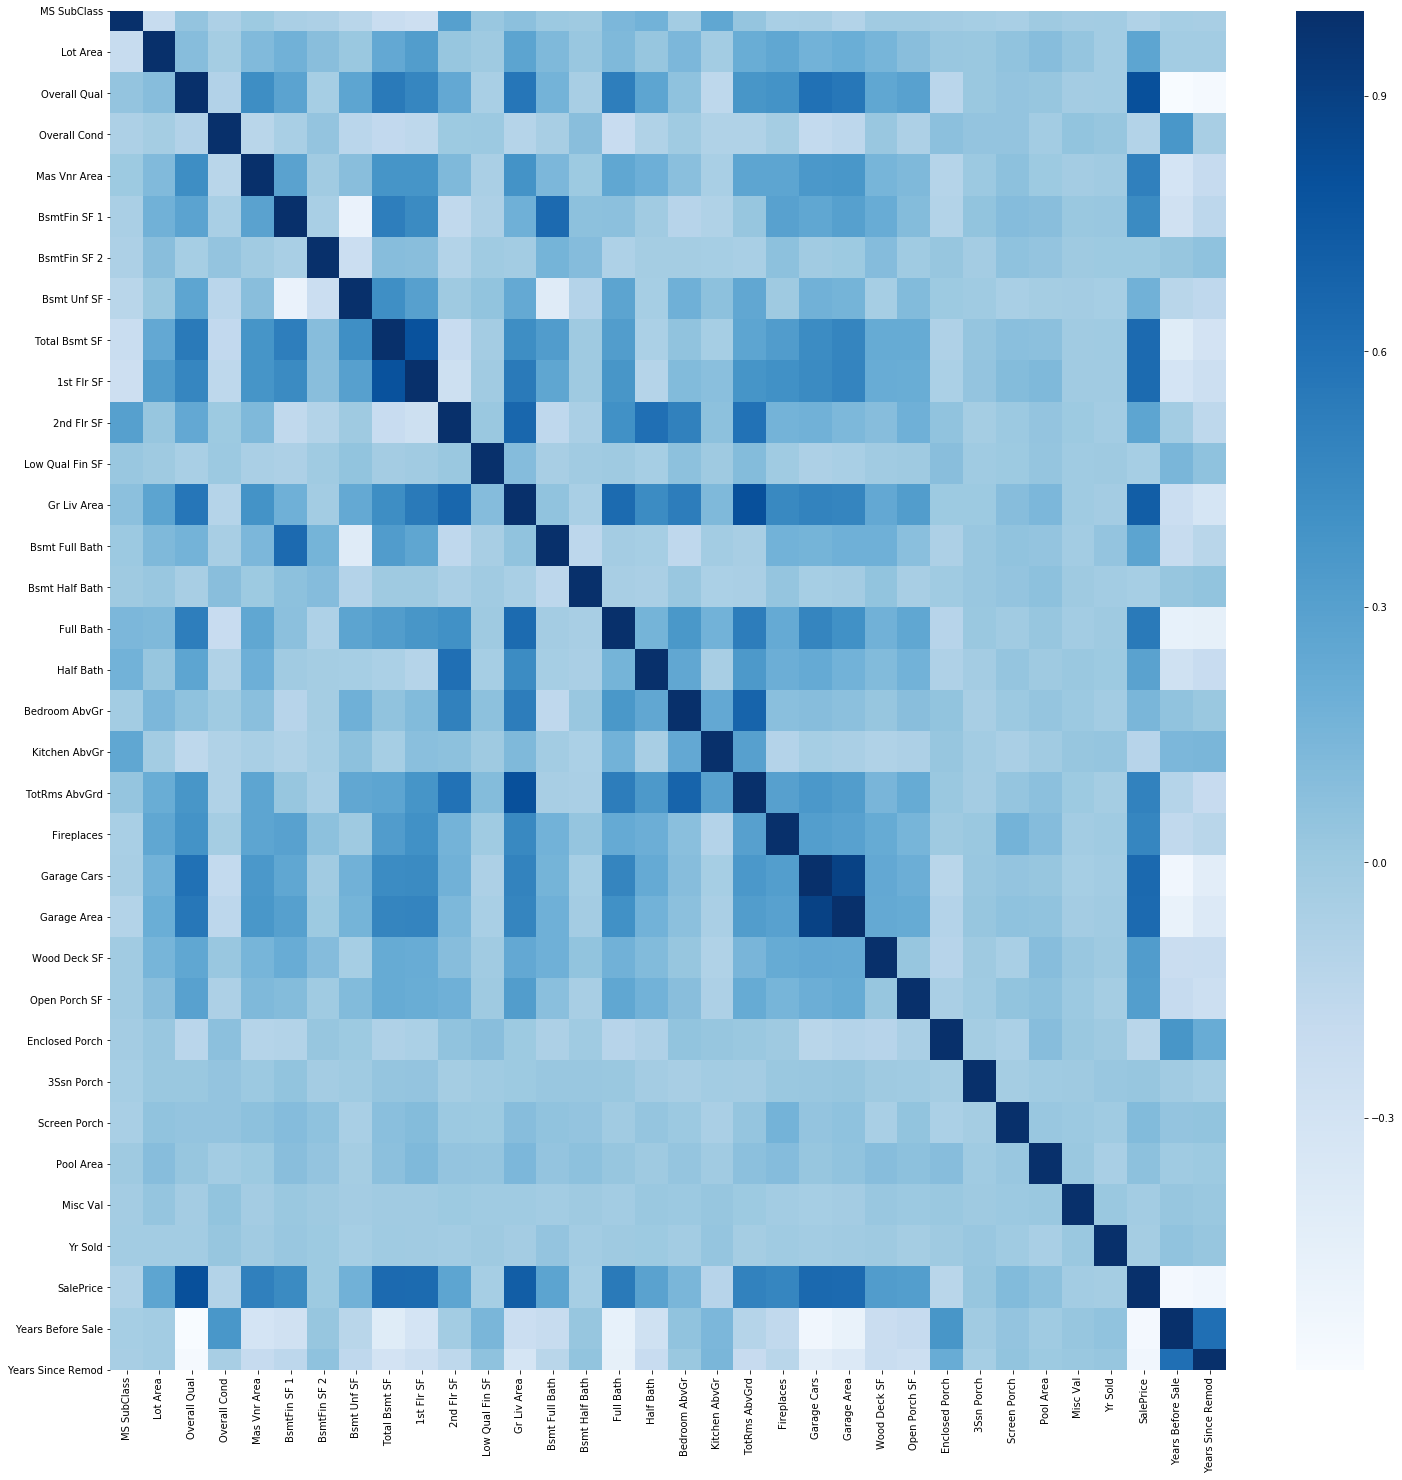

In [10]:
# Check correlations
plt.figure(figsize=(25, 25))
corr = numerical_df.corr()
sns.heatmap(corr, cmap="Blues", annot=False)
plt.show()

In [11]:
# Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
cols_good_corr = abs(corr['SalePrice']).sort_values(ascending = False)
cols_good_corr[cols_good_corr > 0.4]

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648411
Total Bsmt SF        0.643601
Garage Area          0.641675
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.510611
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.438928
Name: SalePrice, dtype: float64

In [12]:
cols_good_corr = cols_good_corr[cols_good_corr > 0.4]
corr_good_col = cols_good_corr.index
transformed_df[corr_good_col].head(3)

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Years Before Sale,Full Bath,Years Since Remod,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1
0,215000,6,1656,2.0,1080.0,528.0,1656,50,1,50,112.0,7,2,639.0
1,105000,5,896,1.0,882.0,730.0,896,49,1,49,0.0,5,0,468.0
2,172000,6,1329,1.0,1329.0,312.0,1329,52,1,52,108.0,6,0,923.0


Here below we take into consideration several things :
- Some columns in the data frame should be converted to the categorical data type.
- All of the columns that can be categorized as nominal variables are candidates for being converted to categorical. 
- For this we need to bear in mind:
    - If a categorical column has hundreds of unique values (or categories), we maybe should not keep it. 
    - When we dummy code this column, hundreds of columns will need to be added back to the data frame.
    - Some categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category.
    - This would be similar to a low variance numerical feature (no variability in the data for the model to capture).

In [13]:
categorical_df = transform_features2(df).select_dtypes(include=['object'])
categorical_df.head(5)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,TA,TA,CBlock,GasA,Fa,Y,TA,Typ,P
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,GasA,TA,Y,TA,Typ,Y
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,GasA,TA,Y,Gd,Typ,Y
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,Gd,TA,CBlock,GasA,Ex,Y,Ex,Typ,Y
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Gd,Y,TA,Typ,Y


In [14]:
cols = categorical_df.columns
bad_cat_col = list() # These are the categorical columns that we should not use as features and therefore drop.

for col in cols : 
    biggest_val = (categorical_df[col].value_counts()[0]/ categorical_df.shape[0])*100
    count_unique = categorical_df[col].nunique()
    print(count_unique)
    print((categorical_df[col].value_counts()/ categorical_df.shape[0])*100)
    if count_unique > 10 or biggest_val >= 95 :
        bad_cat_col.append(col)

7
RL         77.553809
RM         15.784079
FV          4.748890
RH          0.922446
C (all)     0.854117
A (agr)     0.068329
I (all)     0.068329
Name: MS Zoning, dtype: float64
2
Pave    99.590024
Grvl     0.409976
Name: Street, dtype: float64
4
Reg    63.512128
IR1    33.344722
IR2     2.596515
IR3     0.546635
Name: Lot Shape, dtype: float64
4
Lvl    89.921421
HLS     4.099761
Bnk     3.928937
Low     2.049880
Name: Land Contour, dtype: float64
3
AllPub    99.897506
NoSewr     0.068329
NoSeWa     0.034165
Name: Utilities, dtype: float64
5
Inside     73.044072
Corner     17.423984
CulDSac     6.149641
FR2         2.903997
FR3         0.478305
Name: Lot Config, dtype: float64
3
Gtl    95.182781
Mod     4.270584
Sev     0.546635
Name: Land Slope, dtype: float64
28
NAmes      15.134950
CollgCr     9.121968
OldTown     8.165357
Edwards     6.559617
Somerst     6.217971
Gilbert     5.637171
NridgHt     5.637171
Sawyer      5.158866
NWAmes      4.475572
SawyerW     4.270584
Mitchel     

In [15]:
bad_cat_col

['Street',
 'Utilities',
 'Land Slope',
 'Neighborhood',
 'Condition 2',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Heating']

In [16]:
cat_good_cols = categorical_df.drop(bad_cat_col, axis = 1).columns
cat_good_cols

Index(['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Condition 1',
       'Bldg Type', 'House Style', 'Roof Style', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating QC', 'Central Air', 'Kitchen Qual', 'Functional',
       'Paved Drive'],
      dtype='object')

In [17]:
corr_good_col

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Years Before Sale',
       'Full Bath', 'Years Since Remod', 'Mas Vnr Area', 'TotRms AbvGrd',
       'Fireplaces', 'BsmtFin SF 1'],
      dtype='object')

In [18]:
# Some columns are currently numerical but need to be encoded as categorical instead
# (because the numbers don't have any semantic meaning). Such as ["PID", "MS SubClass"] but we removed "PID" earlier

In [19]:
# corr_good_col + cat_good_cols
corr_cat = ["MS SubClass"] + corr_good_col.values.tolist() + cat_good_cols.values.tolist()

In [20]:
transformed_df = transform_features2(df)
transformed_df = transformed_df[corr_cat]
transformed_df.head(3)

,MS SubClass,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Years Before Sale,Full Bath,Years Since Remod,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,MS Zoning,Lot Shape,Land Contour,Lot Config,Condition 1,Bldg Type,House Style,Roof Style,Exter Qual,Exter Cond,Foundation,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive
0,20,215000,6,1656,2.0,1080.0,528.0,1656,50,1,50,112.0,7,2,639.0,RL,IR1,Lvl,Corner,Norm,1Fam,1Story,Hip,TA,TA,CBlock,Fa,Y,TA,Typ,P
1,20,105000,5,896,1.0,882.0,730.0,896,49,1,49,0.0,5,0,468.0,RH,Reg,Lvl,Inside,Feedr,1Fam,1Story,Gable,TA,TA,CBlock,TA,Y,TA,Typ,Y
2,20,172000,6,1329,1.0,1329.0,312.0,1329,52,1,52,108.0,6,0,923.0,RL,IR1,Lvl,Corner,Norm,1Fam,1Story,Hip,TA,TA,CBlock,TA,Y,Gd,Typ,Y


In [21]:
# Convert text to categorical
for col in cat_good_cols.values.tolist() :
    transformed_df[col] = transformed_df[col].astype('category')

# Convert to dummies
for col in cat_good_cols.values.tolist() :
    dummy_cols = pd.get_dummies(transformed_df[col])
    transformed_df = pd.concat([transformed_df, dummy_cols], axis = 1)
    transformed_df = transformed_df.drop(columns = col)
    
transformed_df.shape

(2927, 101)

In [22]:
transformed_df.head(3)

,MS SubClass,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Years Before Sale,Full Bath,Years Since Remod,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,A (agr),C (all),FV,I (all),RH,RL,RM,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,Corner,CulDSac,FR2,FR3,Inside,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard,Shed,Ex,Fa,Gd,TA,Ex,Fa,Gd,Po,TA,BrkTil,CBlock,PConc,Slab,Stone,Wood,Ex,Fa,Gd,Po,TA,N,Y,Ex,Fa,Gd,Po,TA,Maj1,Maj2,Min1,Min2,Mod,Sal,Sev,Typ,N,P,Y
0,20,215000,6,1656,2.0,1080.0,528.0,1656,50,1,50,112.0,7,2,639.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,20,105000,5,896,1.0,882.0,730.0,896,49,1,49,0.0,5,0,468.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,20,172000,6,1329,1.0,1329.0,312.0,1329,52,1,52,108.0,6,0,923.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [23]:
# We need to check which categorical columns "correlate" well with SalePrice.
corr_dummy = abs(transformed_df.corr()['SalePrice']).sort_values(ascending = False)
corr_dummy[corr_dummy > 0.4]

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648411
Total Bsmt SF        0.643601
Garage Area          0.641675
1st Flr SF           0.635185
TA                   0.591013
Years Before Sale    0.558979
Full Bath            0.546118
Ex                   0.540099
Years Since Remod    0.534985
TA                   0.526714
PConc                0.520974
Mas Vnr Area         0.510611
TotRms AbvGrd        0.498574
Ex                   0.484861
Fireplaces           0.474831
Ex                   0.454492
Gd                   0.446338
BsmtFin SF 1         0.438928
Name: SalePrice, dtype: float64

In [24]:
# Now we improve the select_features function
# This function should take in the new, modified train and test data frames that were returned from transform_features().
def select_features2(df_fct2) :

    numerical_df = df_fct2.select_dtypes(include=['integer', 'float'])
    corr = numerical_df.corr()
    cols_good_corr = abs(corr['SalePrice']).sort_values(ascending = False)
    cols_good_corr = cols_good_corr[cols_good_corr > 0.4]
    corr_good_col = cols_good_corr.index

    categorical_df = df_fct2.select_dtypes(include=['object'])
    cols = categorical_df.columns
    bad_cat_col = list() # These are the categorical columns that we should not use as features and therefore drop.

    for col in cols : 
        biggest_val = (categorical_df[col].value_counts()[0]/ categorical_df.shape[0])*100
        count_unique = categorical_df[col].nunique()
        if count_unique > 10 or biggest_val >= 95 :
            bad_cat_col.append(col)

    cat_good_cols = categorical_df.drop(bad_cat_col, axis = 1).columns
    corr_cat = ["MS SubClass"] + corr_good_col.values.tolist() + cat_good_cols.values.tolist()
    temp_df = df_fct2[corr_cat]

    for col in cat_good_cols.values.tolist() :
        temp_df[col] = temp_df[col].astype('category')

    for col in cat_good_cols.values.tolist() :
        dummy_cols = pd.get_dummies(temp_df[col])
        temp_df = pd.concat([temp_df, dummy_cols], axis = 1)
        temp_df = temp_df.drop(columns = col)
    
    return temp_df

In [25]:
# We rerun the main
transformed_df2 = transform_features2(df)
filtered_feature_df2 = select_features2(transformed_df2)
rmse2 = train_and_test(filtered_feature_df2)

print(rmse2)

32915.61059992299


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


This result is significantly better than the previous 55275

In [26]:
filtered_feature_df2.head()

,MS SubClass,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Years Before Sale,Full Bath,Years Since Remod,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,A (agr),C (all),FV,I (all),RH,RL,RM,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,Corner,CulDSac,FR2,FR3,Inside,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard,Shed,Ex,Fa,Gd,TA,Ex,Fa,Gd,Po,TA,BrkTil,CBlock,PConc,Slab,Stone,Wood,Ex,Fa,Gd,Po,TA,N,Y,Ex,Fa,Gd,Po,TA,Maj1,Maj2,Min1,Min2,Mod,Sal,Sev,Typ,N,P,Y
0,20,215000,6,1656,2.0,1080.0,528.0,1656,50,1,50,112.0,7,2,639.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,20,105000,5,896,1.0,882.0,730.0,896,49,1,49,0.0,5,0,468.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,20,172000,6,1329,1.0,1329.0,312.0,1329,52,1,52,108.0,6,0,923.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,20,244000,7,2110,2.0,2110.0,522.0,2110,42,2,42,0.0,8,2,1065.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,60,189900,5,1629,2.0,928.0,482.0,928,13,2,12,0.0,6,1,791.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


### Step 3 : improving training and testing

For step 3, we want to do several things :
- We put a optional k parameter that should accept integer values, with a default value of 0.
- When k equals 0, perform holdout validation (what we already implemented):
    - Select the first 1460 rows and assign to train.
    - Select the remaining rows and assign to test.
    - Train on train and test on test.
    - Compute the RMSE and return.
- When k equals 1, perform simple cross validation:
    - Shuffle the ordering of the rows in the data frame.
    - Select the first 1460 rows and assign to fold_one.
    - Select the remaining rows and assign to fold_two.
    - Train on fold_one and test on fold_two.
    - Train on fold_two and test on fold_one.
    - Compute the average RMSE and return.
- When k is greater than 0, implement k-fold cross validation using k folds:
    - Perform k-fold cross validation using k folds.
    - Calculate the average RMSE value and return this value.

In [27]:
def train_and_test_2(df_fct3, k) :
    if k == 0 :
        train = df_fct3.iloc[:1460,]
        test = df_fct3.iloc[1460:,]
        features = train.drop(['SalePrice'], axis = 1).columns

        lr = LinearRegression()
        lr.fit(train[features], train['SalePrice'])
        train_predictions = lr.predict(test[features])
        train_mse = mean_squared_error(train_predictions, test['SalePrice'])
        train_rmse = np.sqrt(train_mse)
    
    elif k == 1 :
        shuffled_index = np.random.permutation(df_fct3.index)
        df_fct3 = df_fct3.reindex(shuffled_index)
        df_fct3.loc[df_fct3.index[:1460], "fold"] = 1
        df_fct3.loc[df_fct3.index[1460:], "fold"] = 2
        train = df_fct3[df_fct3["fold"] == 1]
        test = df_fct3[df_fct3["fold"] == 2]
        features = train.drop(['SalePrice', 'fold'], axis = 1).columns

        lr = LinearRegression()
        lr.fit(train[features], train['SalePrice'])
        train_predictions = lr.predict(test[features])
        mse1 = mean_squared_error(train_predictions, test['SalePrice'])
        rmse1 = np.sqrt(mse1)
        
        train = df_fct3[df_fct3["fold"] == 2]
        test = df_fct3[df_fct3["fold"] == 1]
        lr.fit(train[features], train['SalePrice'])
        train_predictions = lr.predict(test[features])
        mse2 = mean_squared_error(train_predictions, test['SalePrice'])
        rmse2 = np.sqrt(mse2)   
        
        rmse_values = [rmse1, rmse2]
        train_rmse = (rmse1 + rmse2) / 2
        print('rmse_values : ', rmse_values)
        print('rmse average : ', train_rmse)        
    
    else :
        row_count = df_fct3.shape[0]
        size = round(row_count/k)
        rmse_values = []
        
        for fold in range(1,k+1) :
            df_fct3.loc[df_fct3.index[(size*(fold-1)):size*fold], "fold"] = fold  
        
            train = df_fct3[df_fct3["fold"] != fold]
            test = df_fct3[df_fct3["fold"] == fold]
            features = train.drop(['SalePrice', 'fold'], axis = 1).columns

            lr = LinearRegression()
            lr.fit(train[features], train['SalePrice'])
            train_predictions = lr.predict(test[features])
            mse = mean_squared_error(train_predictions, test['SalePrice'])
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
            train_rmse = np.average(rmse_values)
            
        print('rmse_values : ', rmse_values)
        print('rmse average : ', train_rmse)
        
    return train_rmse

In [28]:
# We rerun the main and use k = 4 
transformed_df3 = transform_features2(df)
filtered_feature_df3 = select_features2(transformed_df3)
rmse3 = train_and_test_2(filtered_feature_df3, 4)

print('rmse3 : ', rmse3)

rmse_values :  [27235.251618675178, 25788.41001759977, 36766.35312387746, 27382.109622201227]
rmse average :  29293.03109558841
rmse3 :  29293.03109558841


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


This result is better than the previous 32915. We can conclude that each step is indeed improving the result.